# Juan Felipe Osorio Franco


# Ejercicio 1

- Presente la solución al problema de optimización kernel ridge (Ver [Kernel Ridge Regression](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf) y [material de apoyo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/2_Kernels_GaussianProcess/1-introKernels.pdf) págs 8 y 9).

$$\Phi = B$$

$$R = I$$ 

$$P=?$$ 

Factorizar para que quede $\alpha$

# Solución al problema de optimización de Kernel Ridge Regression

- **Problema de optimización:**

  Se busca minimizar la siguiente función objetivo respecto a $\omega$:

  $$
  \omega^* = \arg\min_\omega \| y - \Phi \omega \|_2^2 + \alpha \| \omega \|_2^2
  $$

  Donde:
  - $y \in \mathbb{R}^n$ es el vector de observaciones.
  - $\Phi \in \mathbb{R}^{n \times d}$ es la matriz de características.
  - $\alpha > 0$ es el parámetro de regularización.


  - $\Phi = B$
  - $R = I$ (matriz identidad)
  - Encontrar $P$ y expresar la solución en términos de $\alpha$.


  Reemplazamos $\Phi = B$ y $R = I$:

  $$
  \omega^* = \arg\min_\omega \| y - B \omega \|_2^2 + \alpha \| \omega \|_2^2
  $$


  Para encontrar $\omega^*$, derivamos la función objetivo respecto a $\omega$ y la igualamos a cero:

  $$
  \frac{\partial}{\partial \omega} \left( (y - B \omega)^\top (y - B \omega) + \alpha \omega^\top \omega \right ) = 0
  $$

  Calculamos la derivada:

  $$
  -2 B^\top (y - B \omega) + 2 \alpha \omega = 0
  $$

  Reordenamos:

  $$
  -2 B^\top y + 2 B^\top B \omega + 2 \alpha \omega = 0
  $$

  Dividimos ambos lados entre 2:

  $$
  -B^\top y + (B^\top B + \alpha I) \omega = 0
  $$


  Pasamos $B^\top y$ al otro lado:

  $$
  (B^\top B + \alpha I) \omega = B^\top y
  $$

  Por lo tanto:

  $$
  \omega^* = (B^\top B + \alpha I)^{-1} B^\top y
  $$


  Observamos que:

  $$
  P = B^\top B + \alpha I
  $$

  Entonces, $P$ es la matriz positiva definida que incluye el término de regularización $\alpha$.


  El kernel $K$ se define como:

  $$
  K = B B^\top
  $$

  La solución puede expresarse en términos duales:

  $$
  \omega^* = B^\top (K + \alpha I)^{-1} y
  $$


  Para una nueva muestra $x$, la predicción es:

  $$
  \hat{y} = \phi(x)^\top \omega^* = k(x)^\top (K + \alpha I)^{-1} y
  $$

  Donde $k(x) = B \phi(x)^\top$ es el vector de kernel entre $x$ y las muestras de entrenamiento.

  La solución es:

  $$
  \omega^* = (B^\top B + \alpha I)^{-1} B^\top y
  $$

  Donde el término $\alpha$ aparece como factor de regularización en $P$.


## Ejercicio 2

Demostrar la expresión de la probilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

- La verosimilitud $p(\mathbf{t} \mid f(\mathbf{X}))$ es Gaussiana:

   $$
   p(\mathbf{t} \mid f(\mathbf{X})) = \mathscr{N}(\mathbf{t} \mid f(\mathbf{X}), \sigma_\epsilon^2 \mathbf{I}_N).
   $$

- El prior $p(f(\mathbf{X}))$ también es Gaussiano:

   $$
   p(f(\mathbf{X})) = \mathscr{N}(f(\mathbf{X}) \mid \mathbf{0}, \mathbf{K}).
   $$


Dado que $\boldsymbol{\epsilon}$ y $f(\mathbf{X})$ son vectores aleatorios independientes y gaussianos, su suma $\mathbf{t} = f(\mathbf{X}) + \boldsymbol{\epsilon}$ también sigue una distribución gaussiana.


- **Media:**

   $$
   \mathbb{E}[\mathbf{t}] = \mathbb{E}[f(\mathbf{X})] + \mathbb{E}[\boldsymbol{\epsilon}] = \mathbf{0} + \mathbf{0} = \mathbf{0}.
   $$

- **Covarianza:**

   $$
   \operatorname{Cov}(\mathbf{t}) = \operatorname{Cov}(f(\mathbf{X})) + \operatorname{Cov}(\boldsymbol{\epsilon}) = \mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N.
   $$


   Por lo tanto, $\mathbf{t}$ sigue una distribución gaussiana multivariada con media $\mathbf{0}$ y covarianza $\mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N$:

   $$
   p(\mathbf{t}) = \mathscr{N}(\mathbf{t} \mid \mathbf{0}, \mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N).
   $$


In [26]:
import numpy as np
from time import time

# Generate sample data
n_samples = 10000
original_dim = 50

# Create random data
X = np.random.randn(n_samples, original_dim)

def explicit_transformation(X):
    """
    Example of explicit polynomial feature transformation (degree 2)
    This creates all possible quadratic terms
    """
    n_samples, n_features = X.shape
    transformed = []
    
    # Original features
    transformed.append(X)
    
    # Quadratic features
    for i in range(n_features):
        for j in range(i, n_features):
            transformed.append((X[:, i] * X[:, j]).reshape(-1, 1))
    
    return np.hstack(transformed)

def polynomial_kernel(X, Y=None, degree=2):
    """
    Compute the polynomial kernel matrix
    K(x,y) = (x·y + 1)^degree
    """
    if Y is None:
        Y = X
    return (np.dot(X, Y.T) + 1) ** degree

# Time explicit transformation
t0 = time()
X_transformed = explicit_transformation(X)
phi_phi_T = np.dot(X_transformed, X_transformed.T)
explicit_time = time() - t0

# Time kernel trick
t0 = time()
K = polynomial_kernel(X)
kernel_time = time() - t0

print(f"Explicit transformation shape: {X_transformed.shape}")
print(f"Time for explicit computation: {explicit_time:.4f} seconds")
print(f"Time for kernel trick: {kernel_time:.4f} seconds")
print(f"Speedup factor: {explicit_time/kernel_time:.2f}x")

Explicit transformation shape: (10000, 1325)
Time for explicit computation: 1.1168 seconds
Time for kernel trick: 0.4199 seconds
Speedup factor: 2.66x



# Ejercicio 2

- Visualice el kernel rbf para diferentes condiciones de ruido sintonizando los hiperparámetros del modelo utilizando gridsearch. *Ayuda*: modifique la varianza del ruido.

- Realice una descomposición en valores propios de la matriz kernel para cada una de las condiciones de ruido del punto anterior, qué puede discutir sobre el espectro de la matríz y su influencia en el modelo predictivo de kernel ridge?. Cuál es la relación entre el espectro visualizado y el hiperparámetro de regularización o penalidad encontrado por gridsearch en cada caso?. *Ayuda*: utilizando numpy encuentre la descomposición de valores y vectores propios de $\mathbf{K}$ y $\mathbf{K}+\alpha\mathbf{I}$, según los valores de $\gamma$ y $\alpha$ encontrados por GridsearchCV ante cada condición de ruido evaluada.




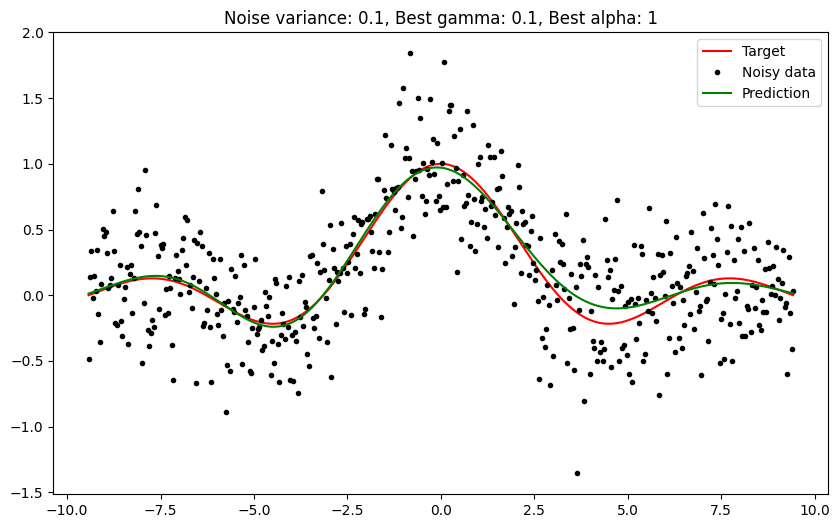

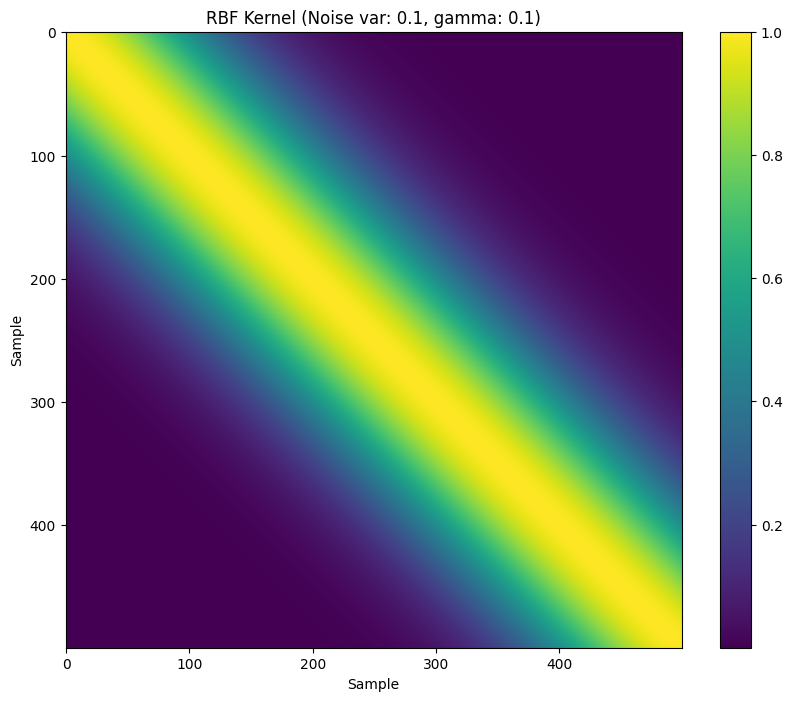

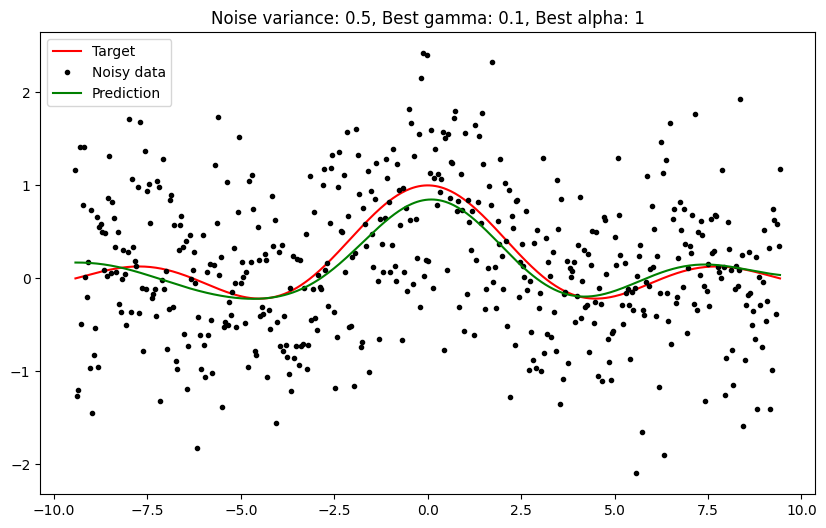

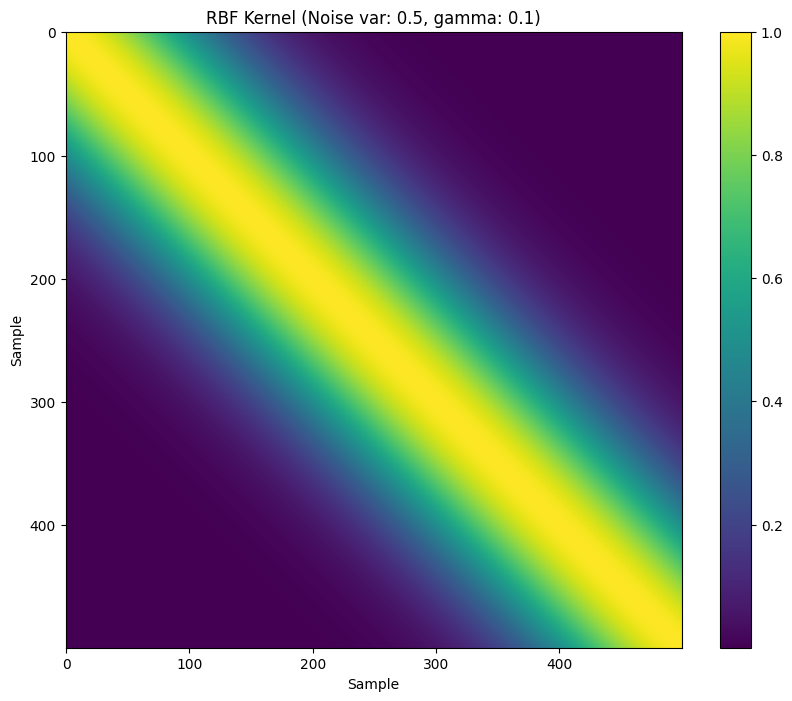

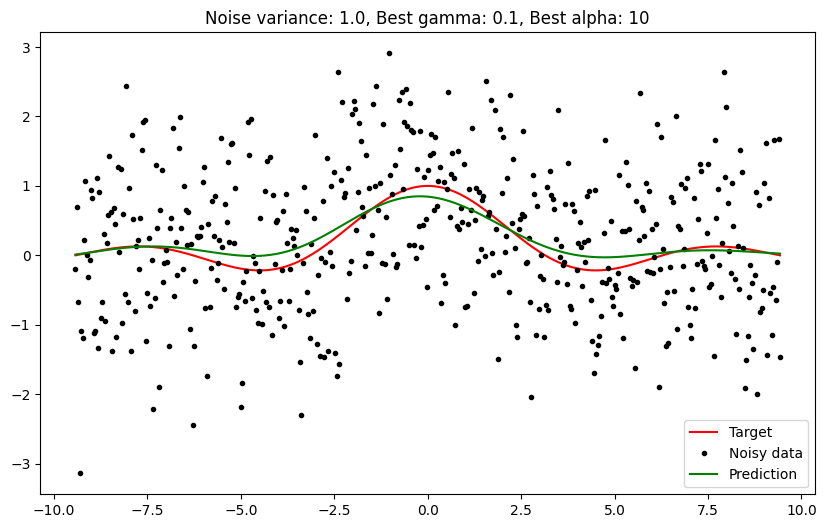

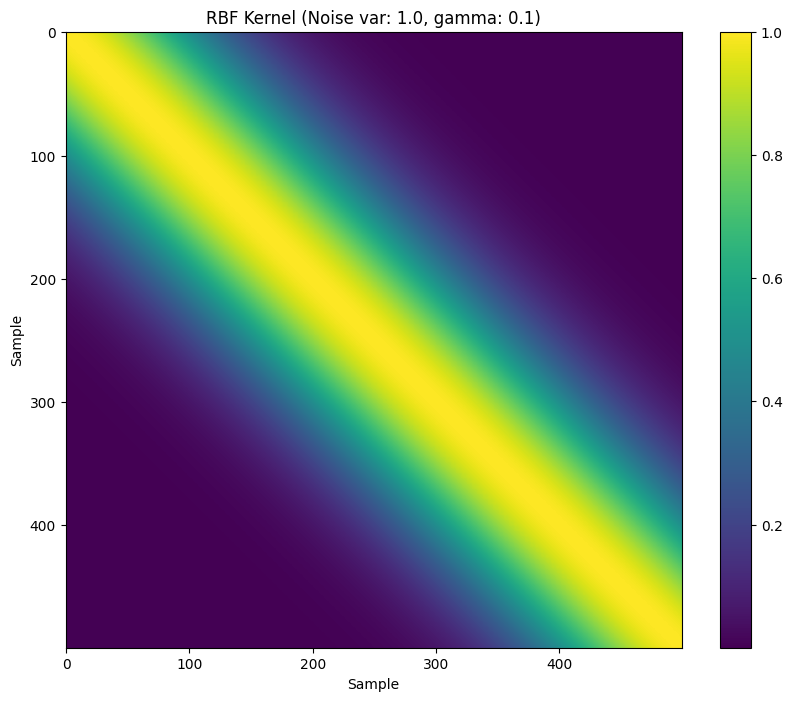

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances

def generate_data(N, var):
    X = np.linspace(-3*np.pi, 3*np.pi, N)
    y = np.sinc(X/np.pi)
    noise = np.random.normal(0, np.sqrt(var), X.shape[0])
    yn = y + noise
    return X.reshape(-1, 1), y.reshape(-1, 1), yn.reshape(-1, 1)

def visualize_kernel(X, gamma, title):
    D = pairwise_distances(X)
    K = np.exp(-0.5 * gamma * D**2)
    plt.figure(figsize=(10, 8))
    plt.imshow(K)
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Sample')
    plt.show()

noise_levels = [0.1, 0.5, 1.0]
N = 500

for var in noise_levels:
    X, y, yn = generate_data(N, var)
    
    X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.3)
    
    steps = [('reg', KernelRidge(kernel='rbf'))]
    parameters = {
        'reg__alpha': [1e-3, 1e-2, 0.1, 1, 10, 100],
        'reg__gamma': [1e-3, 1e-2, 0.1, 1, 10, 100]
    }
    
    pipeline = Pipeline(steps=steps)
    grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_gamma = best_params['reg__gamma']
    best_alpha = best_params['reg__alpha']
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, 'r', label='Target')
    plt.plot(X, yn, 'k.', label='Noisy data')
    plt.plot(X, grid_search.predict(X), 'g', label='Prediction')
    plt.title(f'Noise variance: {var}, Best gamma: {best_gamma}, Best alpha: {best_alpha}')
    plt.legend()
    plt.show()
    
    visualize_kernel(X, best_gamma, f'RBF Kernel (Noise var: {var}, gamma: {best_gamma})')


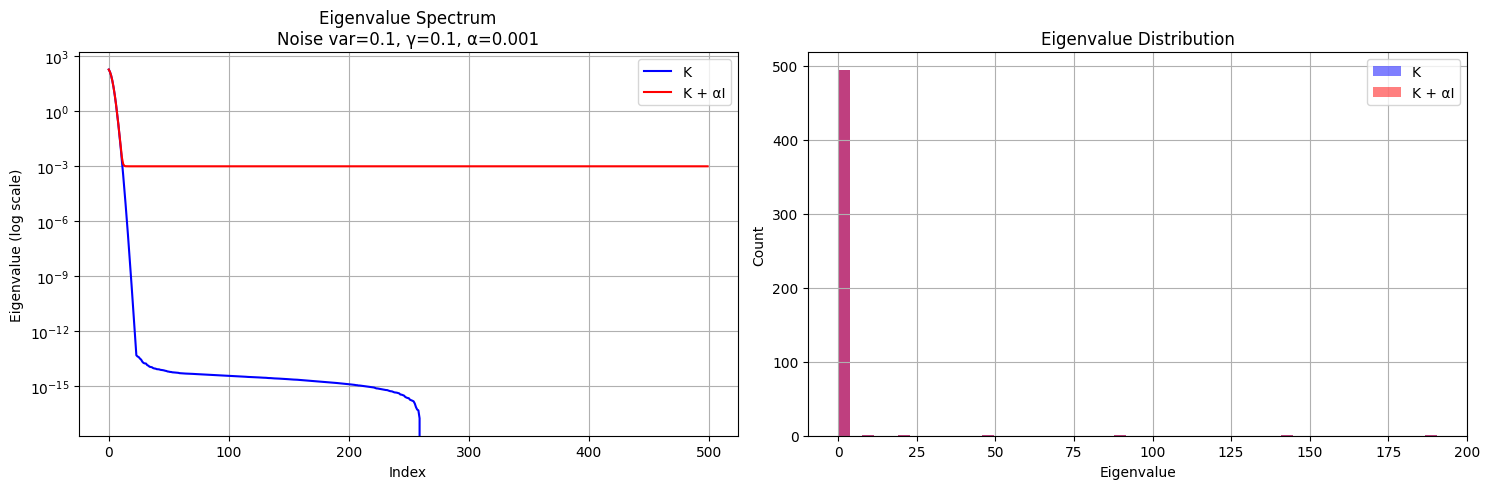


Spectrum Analysis for noise_var=0.1, γ=0.1, α=0.001
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 190.4981
  Min eigenvalue: 1.0000e-03
  Condition number: 1.9050e+05


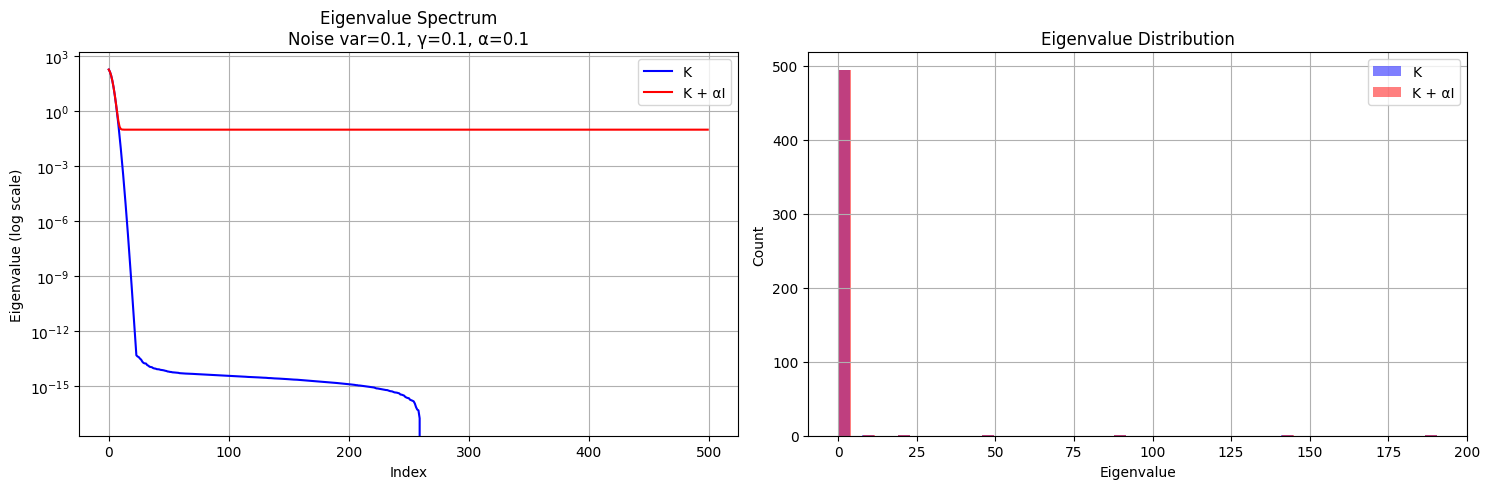


Spectrum Analysis for noise_var=0.1, γ=0.1, α=0.1
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 190.5971
  Min eigenvalue: 1.0000e-01
  Condition number: 1.9060e+03


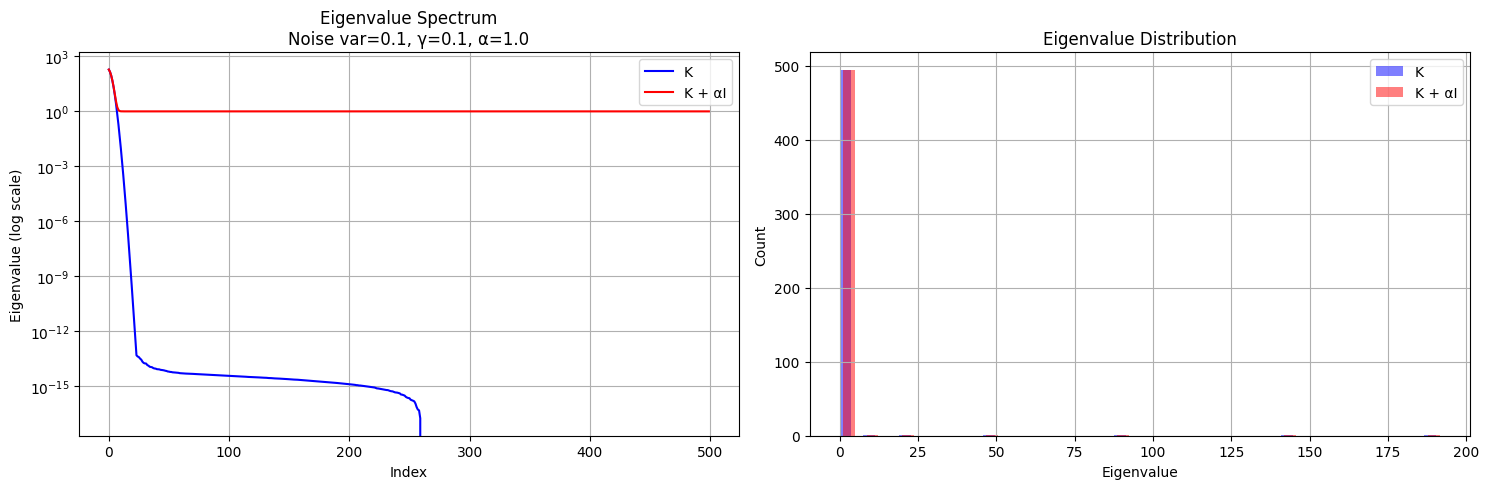


Spectrum Analysis for noise_var=0.1, γ=0.1, α=1.0
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 191.4971
  Min eigenvalue: 1.0000e+00
  Condition number: 1.9150e+02


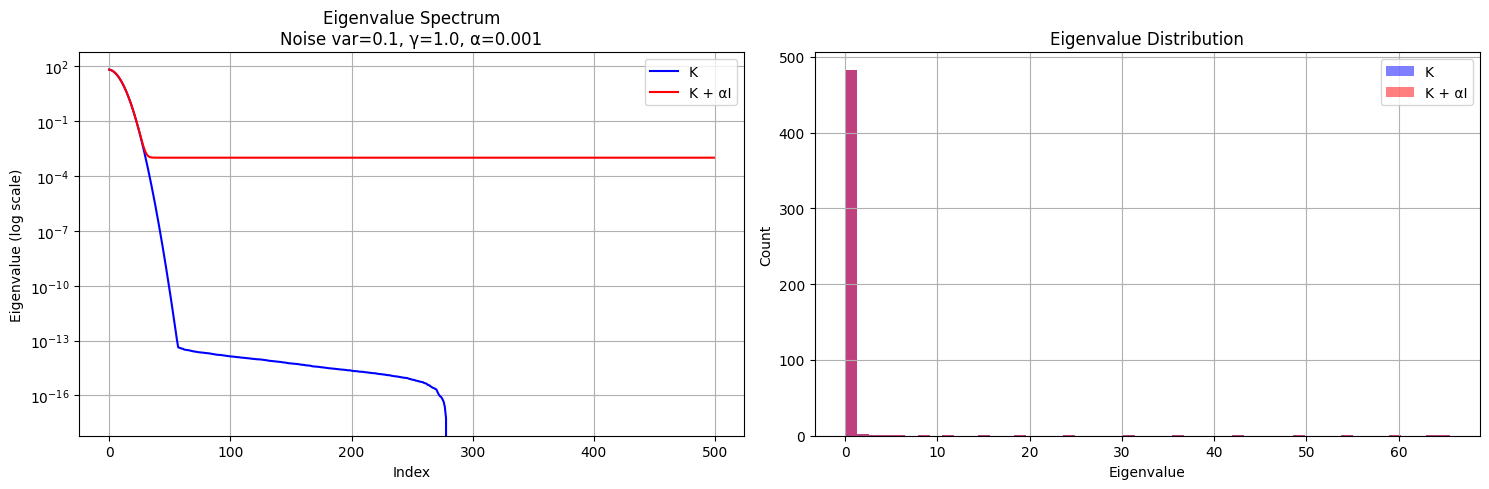


Spectrum Analysis for noise_var=0.1, γ=1.0, α=0.001
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 65.5491
  Min eigenvalue: 1.0000e-03
  Condition number: 6.5549e+04


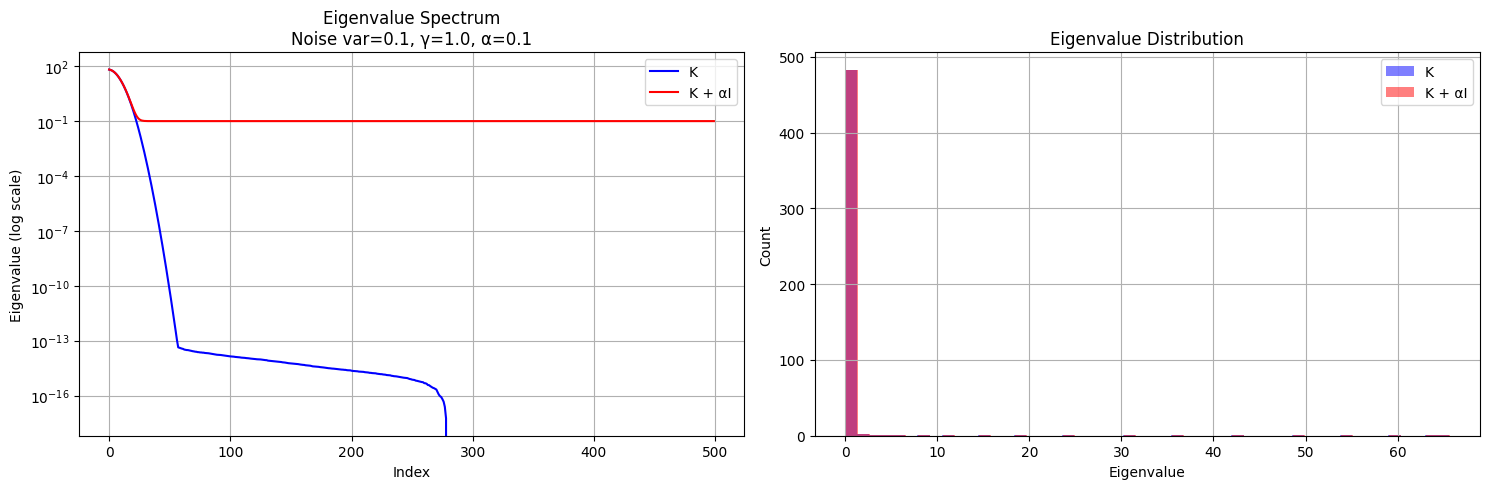


Spectrum Analysis for noise_var=0.1, γ=1.0, α=0.1
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 65.6481
  Min eigenvalue: 1.0000e-01
  Condition number: 6.5648e+02


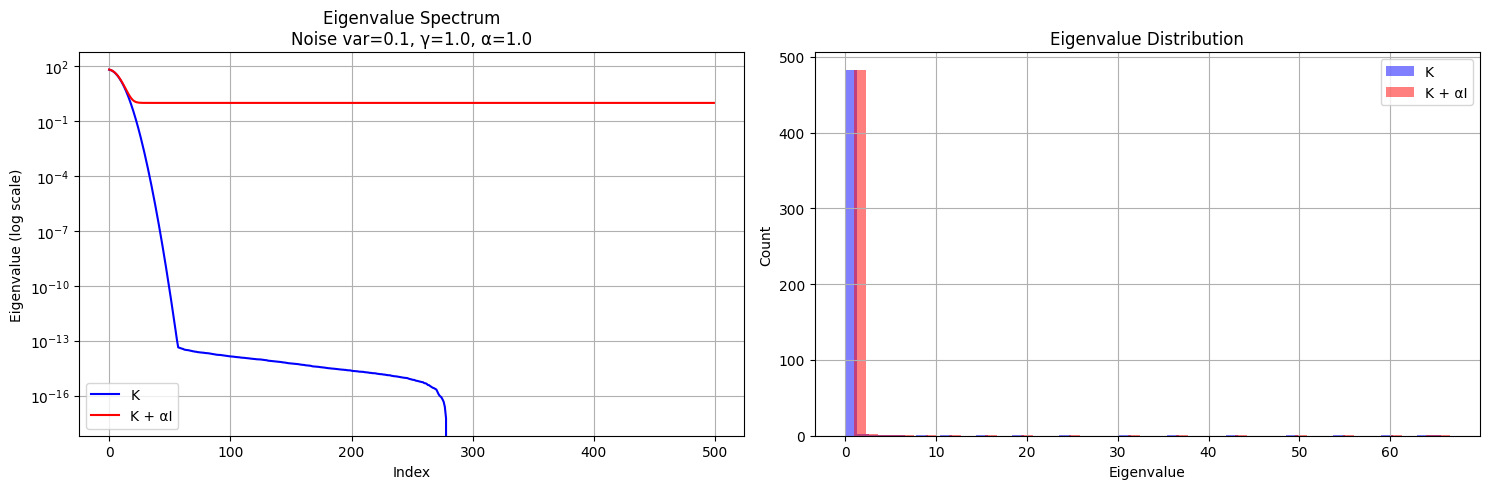


Spectrum Analysis for noise_var=0.1, γ=1.0, α=1.0
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 66.5481
  Min eigenvalue: 1.0000e+00
  Condition number: 6.6548e+01


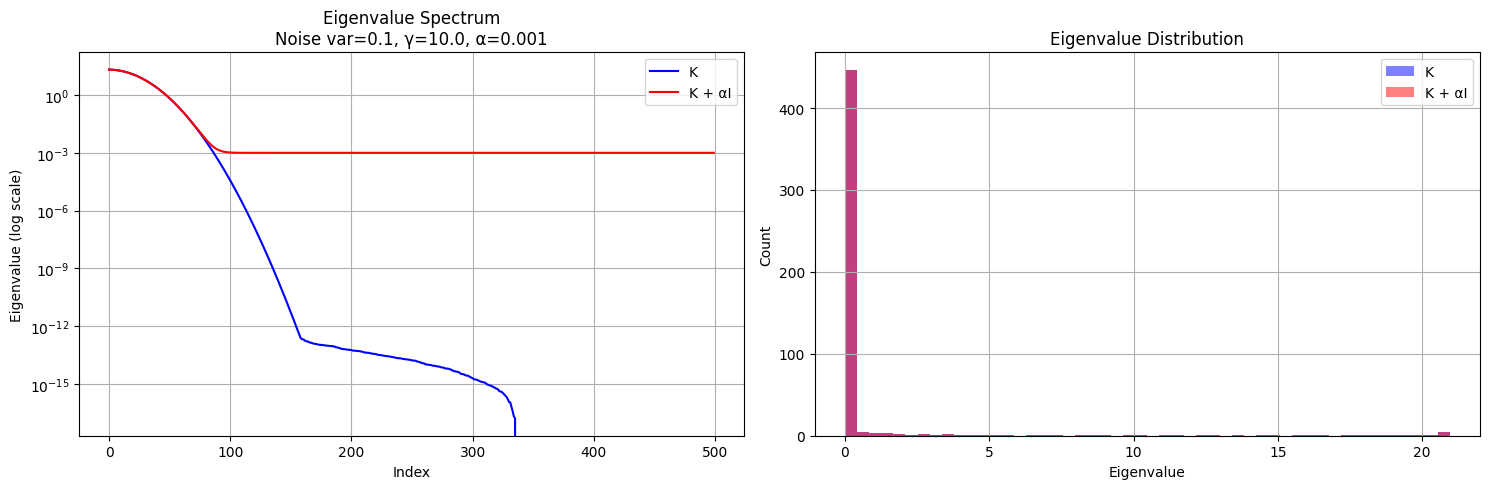


Spectrum Analysis for noise_var=0.1, γ=10.0, α=0.001
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 20.9571
  Min eigenvalue: 1.0000e-03
  Condition number: 2.0957e+04


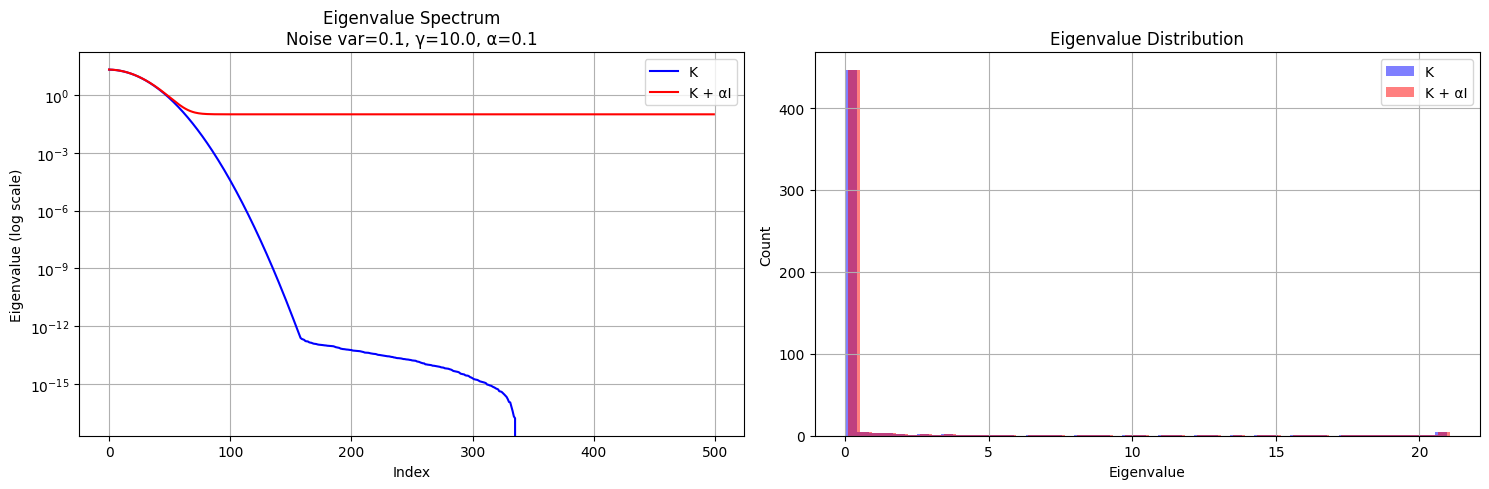


Spectrum Analysis for noise_var=0.1, γ=10.0, α=0.1
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 21.0561
  Min eigenvalue: 1.0000e-01
  Condition number: 2.1056e+02


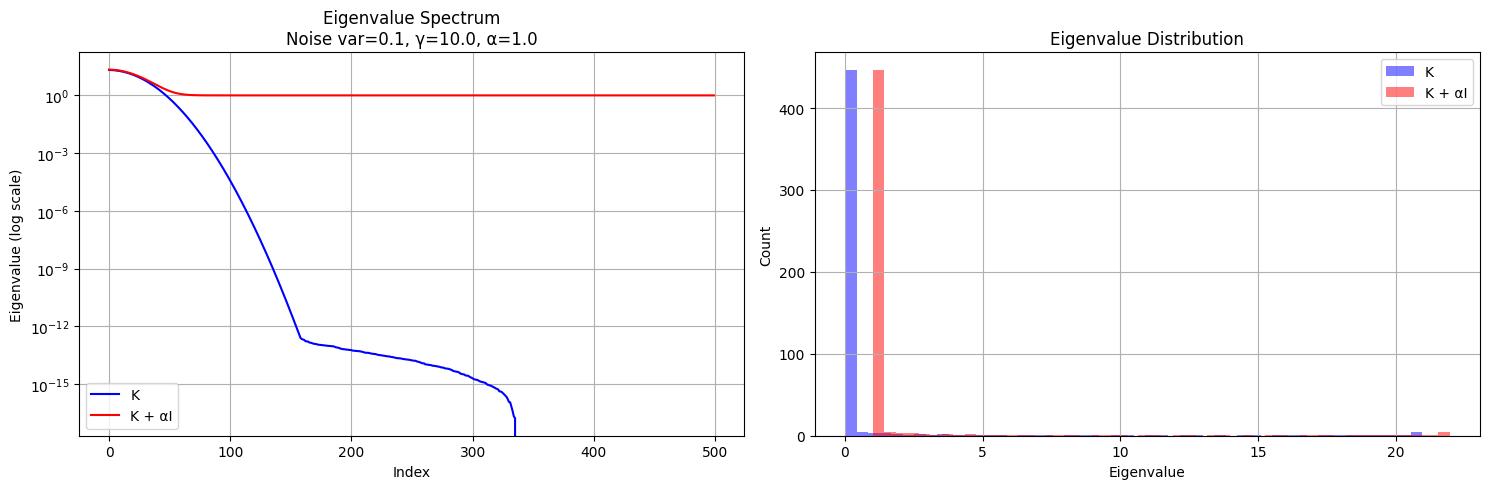


Spectrum Analysis for noise_var=0.1, γ=10.0, α=1.0
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 21.9561
  Min eigenvalue: 1.0000e+00
  Condition number: 2.1956e+01


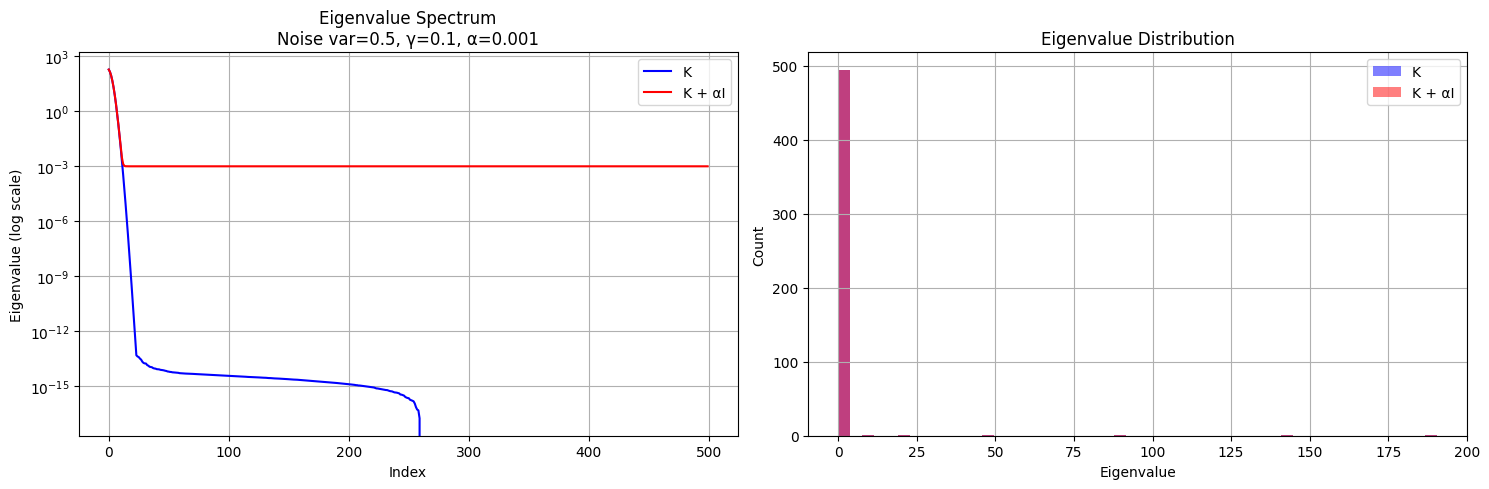


Spectrum Analysis for noise_var=0.5, γ=0.1, α=0.001
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 190.4981
  Min eigenvalue: 1.0000e-03
  Condition number: 1.9050e+05


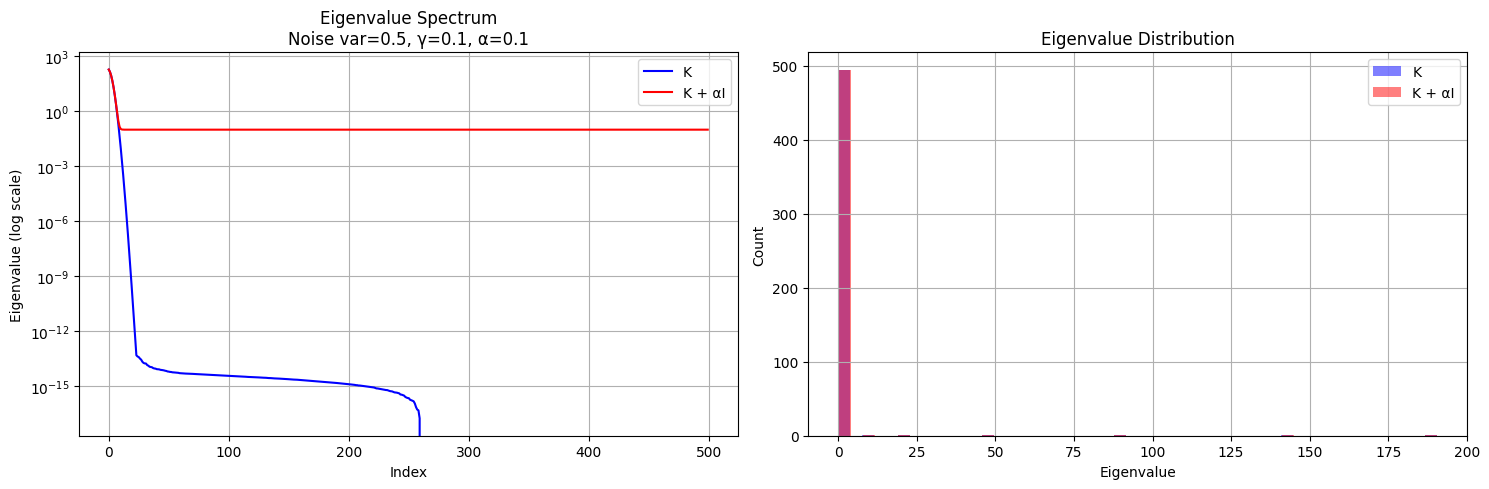


Spectrum Analysis for noise_var=0.5, γ=0.1, α=0.1
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 190.5971
  Min eigenvalue: 1.0000e-01
  Condition number: 1.9060e+03


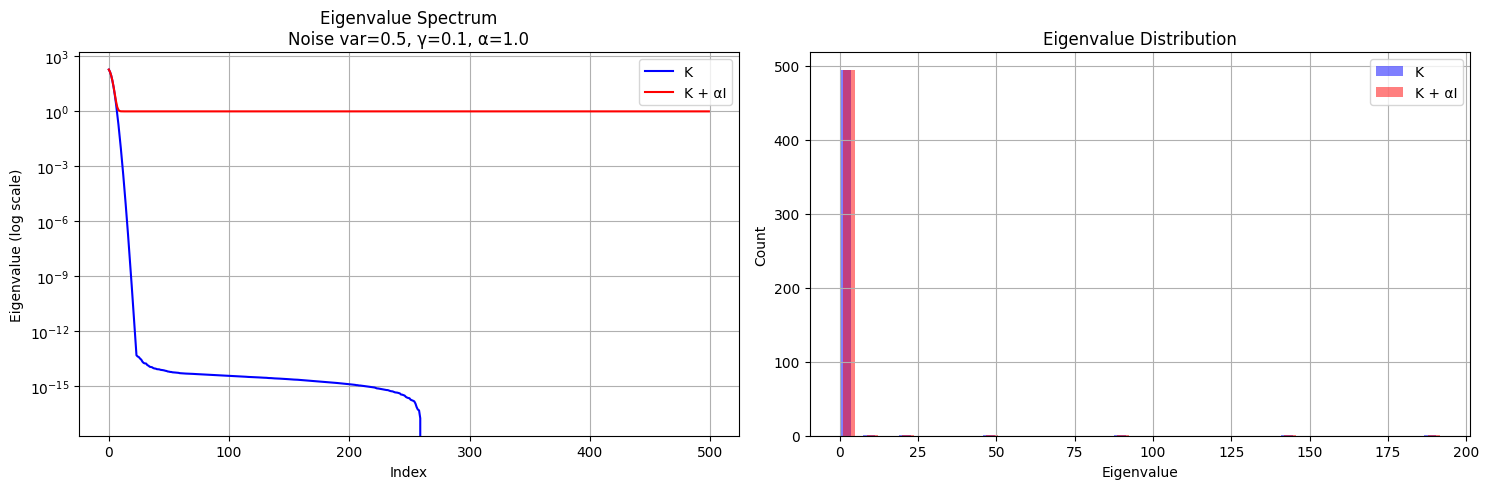


Spectrum Analysis for noise_var=0.5, γ=0.1, α=1.0
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 191.4971
  Min eigenvalue: 1.0000e+00
  Condition number: 1.9150e+02


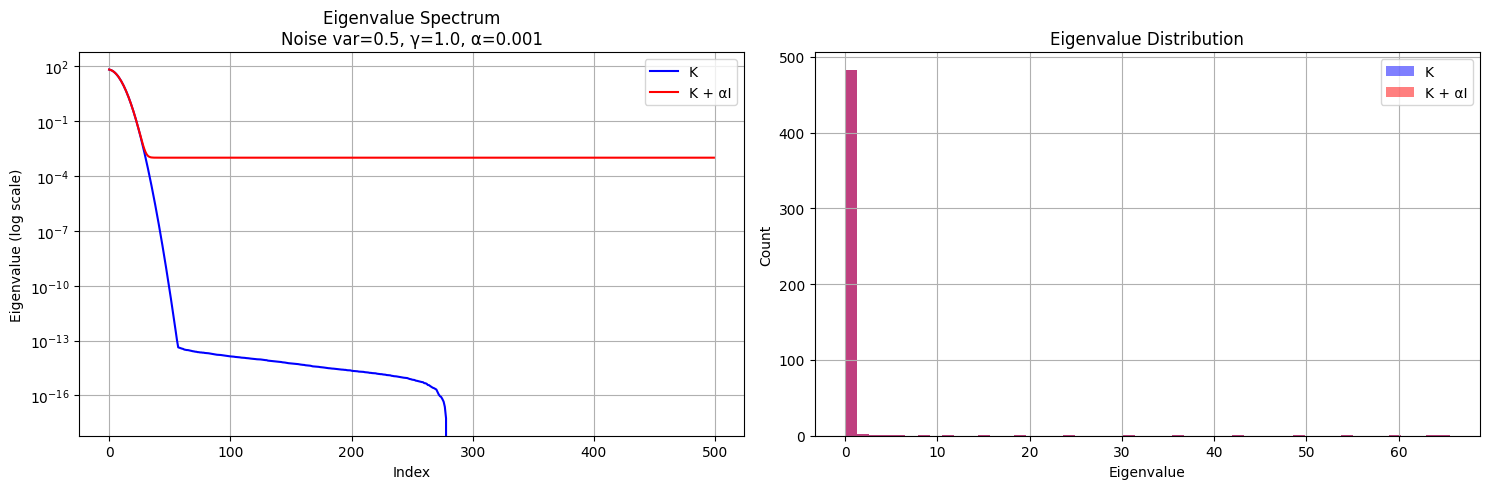


Spectrum Analysis for noise_var=0.5, γ=1.0, α=0.001
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 65.5491
  Min eigenvalue: 1.0000e-03
  Condition number: 6.5549e+04


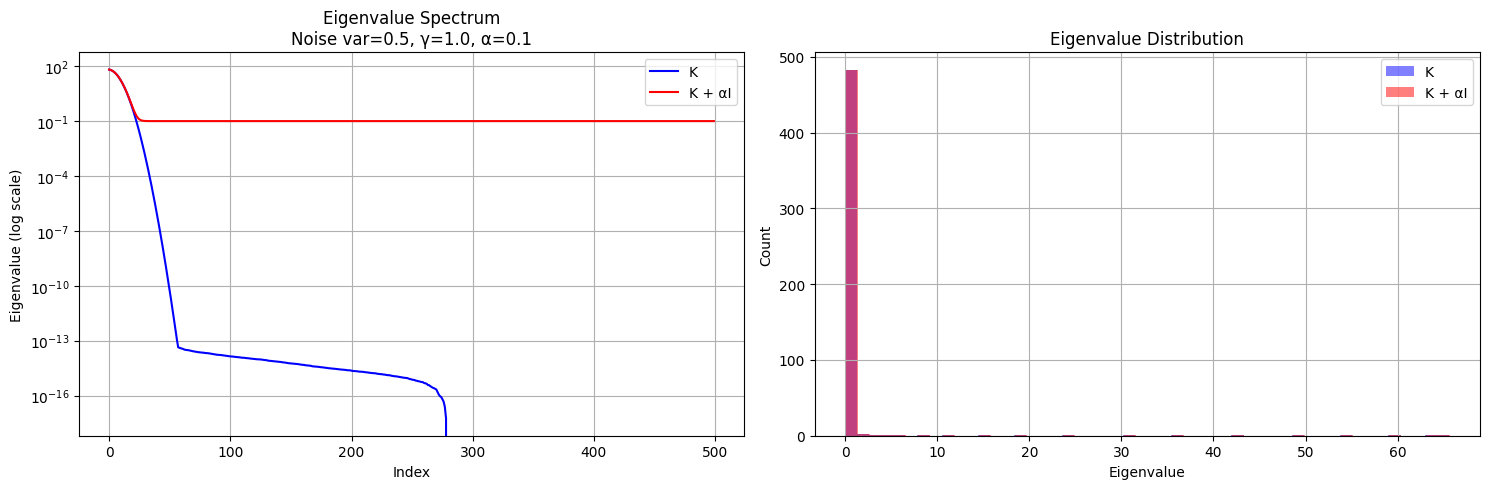


Spectrum Analysis for noise_var=0.5, γ=1.0, α=0.1
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 65.6481
  Min eigenvalue: 1.0000e-01
  Condition number: 6.5648e+02


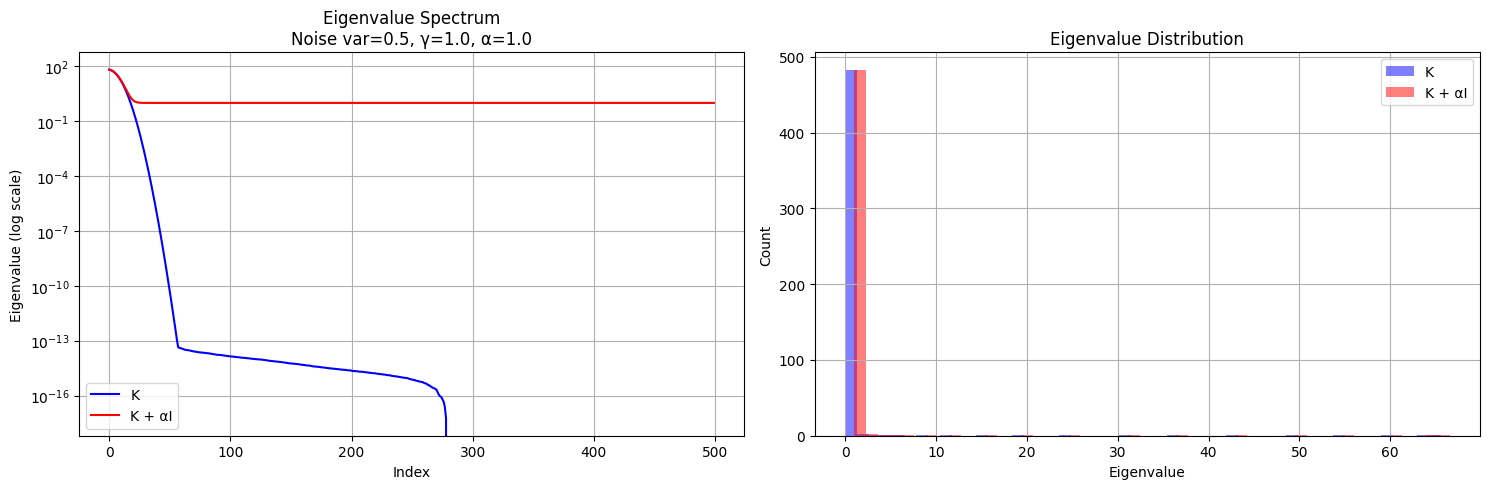


Spectrum Analysis for noise_var=0.5, γ=1.0, α=1.0
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 66.5481
  Min eigenvalue: 1.0000e+00
  Condition number: 6.6548e+01


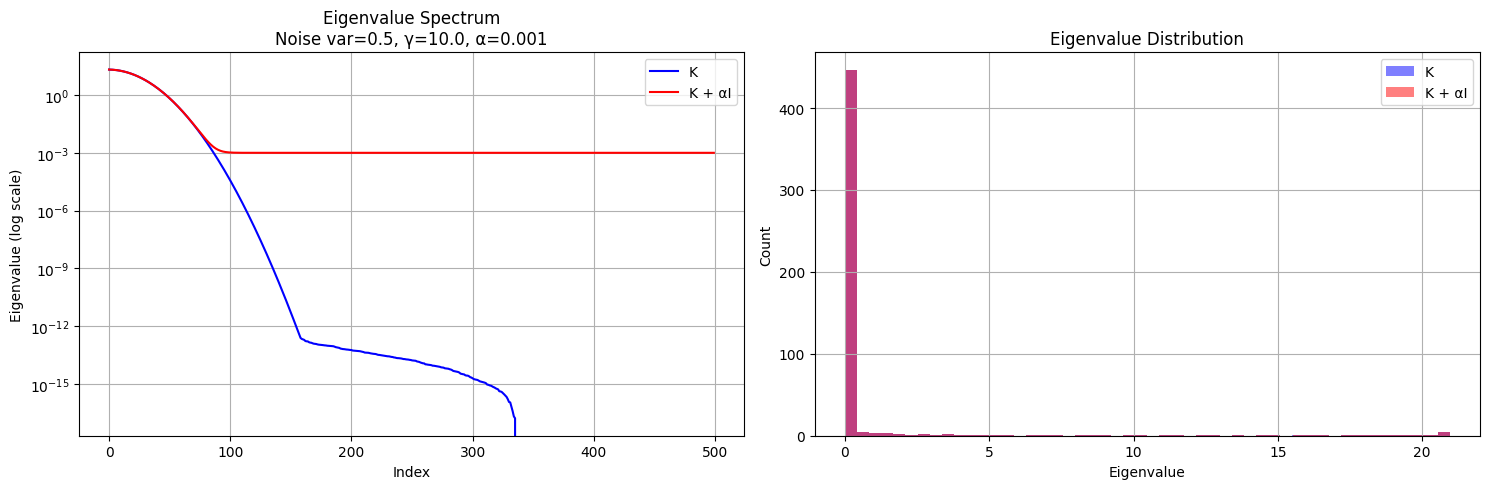


Spectrum Analysis for noise_var=0.5, γ=10.0, α=0.001
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 20.9571
  Min eigenvalue: 1.0000e-03
  Condition number: 2.0957e+04


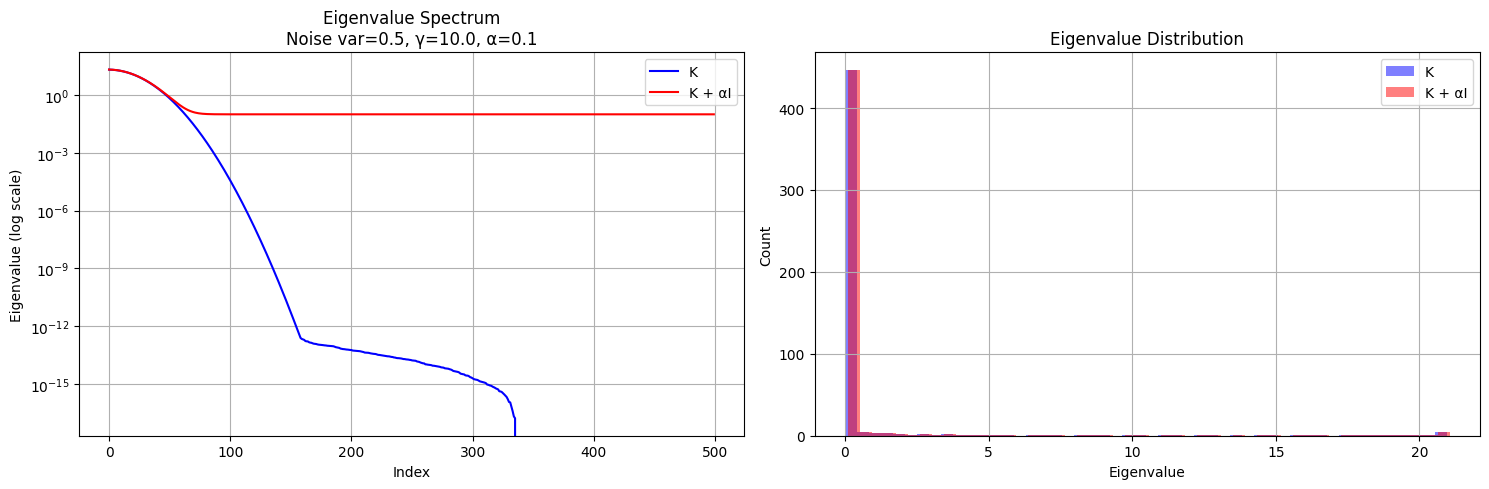


Spectrum Analysis for noise_var=0.5, γ=10.0, α=0.1
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 21.0561
  Min eigenvalue: 1.0000e-01
  Condition number: 2.1056e+02


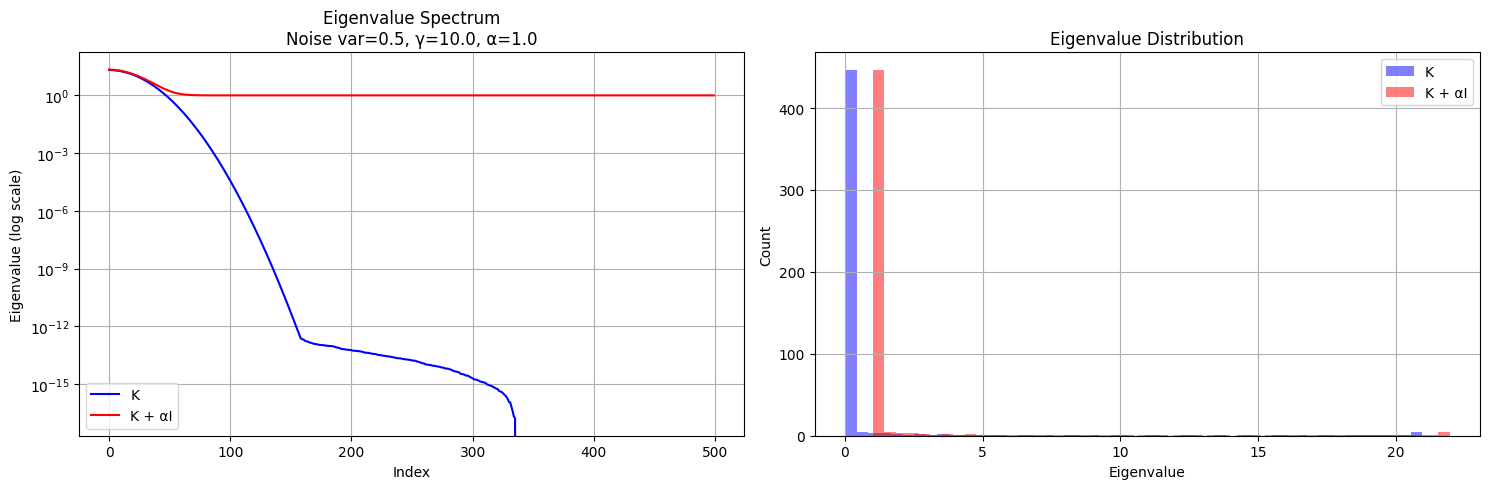


Spectrum Analysis for noise_var=0.5, γ=10.0, α=1.0
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 21.9561
  Min eigenvalue: 1.0000e+00
  Condition number: 2.1956e+01


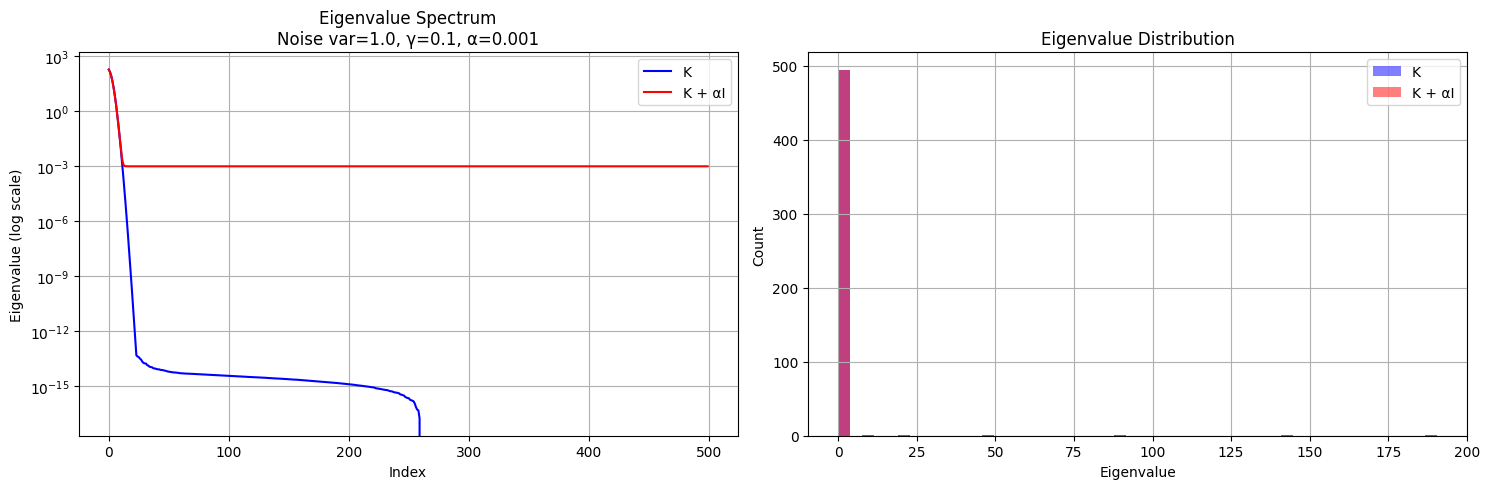


Spectrum Analysis for noise_var=1.0, γ=0.1, α=0.001
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 190.4981
  Min eigenvalue: 1.0000e-03
  Condition number: 1.9050e+05


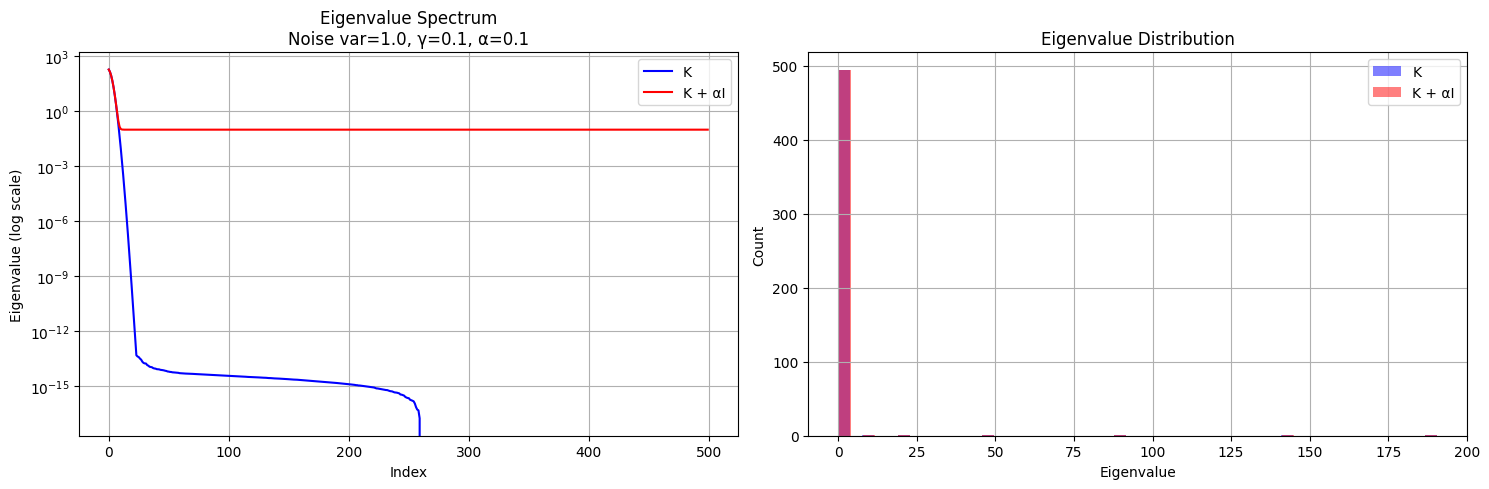


Spectrum Analysis for noise_var=1.0, γ=0.1, α=0.1
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 190.5971
  Min eigenvalue: 1.0000e-01
  Condition number: 1.9060e+03


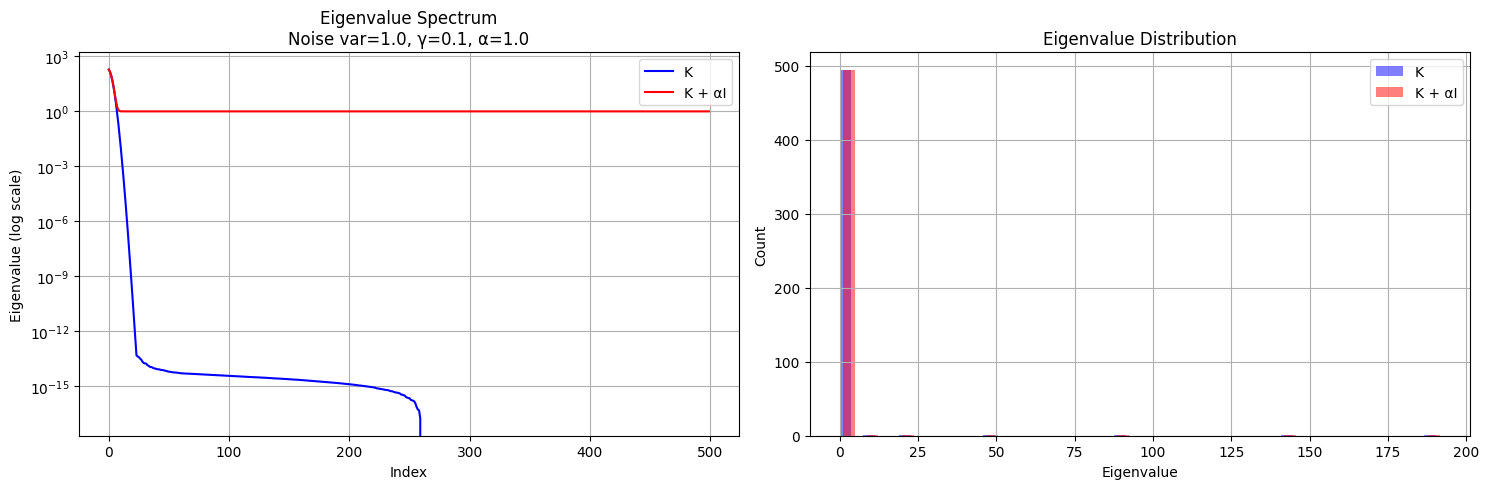


Spectrum Analysis for noise_var=1.0, γ=0.1, α=1.0
Original Kernel (K):
  Max eigenvalue: 190.4971
  Min eigenvalue: -4.5678e-14
  Condition number: -4.1705e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 191.4971
  Min eigenvalue: 1.0000e+00
  Condition number: 1.9150e+02


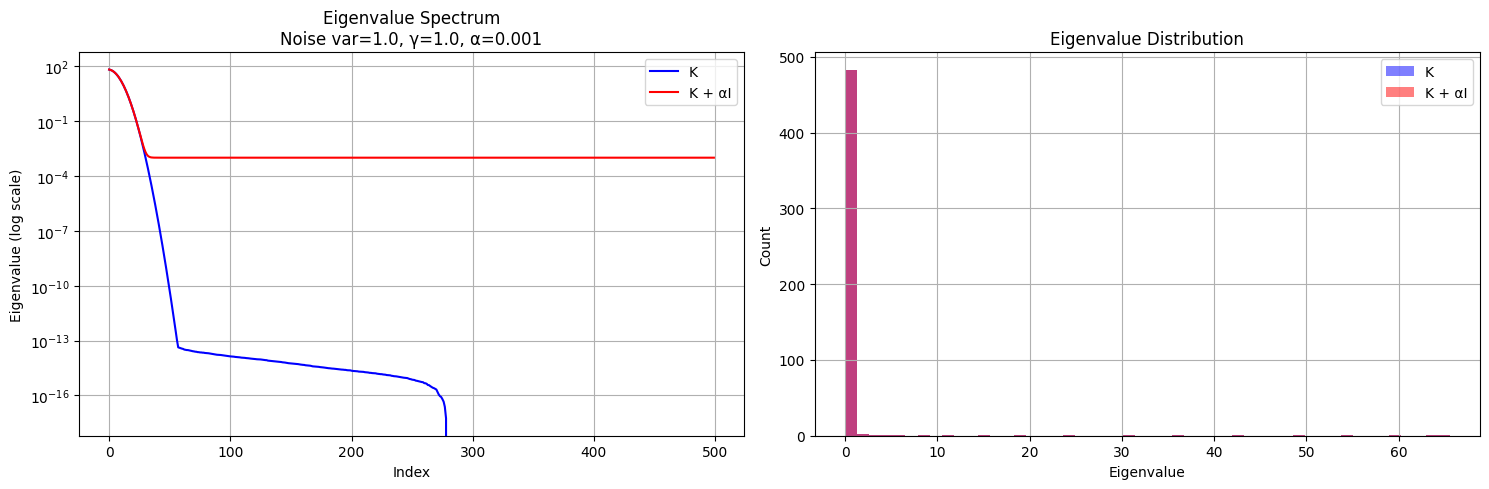


Spectrum Analysis for noise_var=1.0, γ=1.0, α=0.001
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 65.5491
  Min eigenvalue: 1.0000e-03
  Condition number: 6.5549e+04


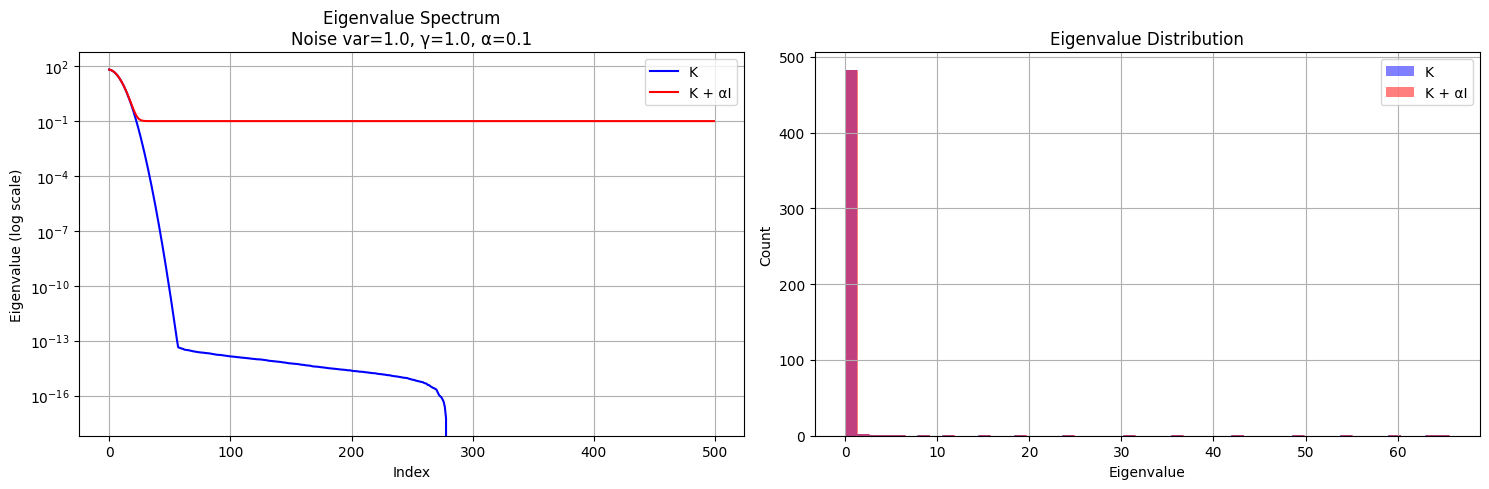


Spectrum Analysis for noise_var=1.0, γ=1.0, α=0.1
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 65.6481
  Min eigenvalue: 1.0000e-01
  Condition number: 6.5648e+02


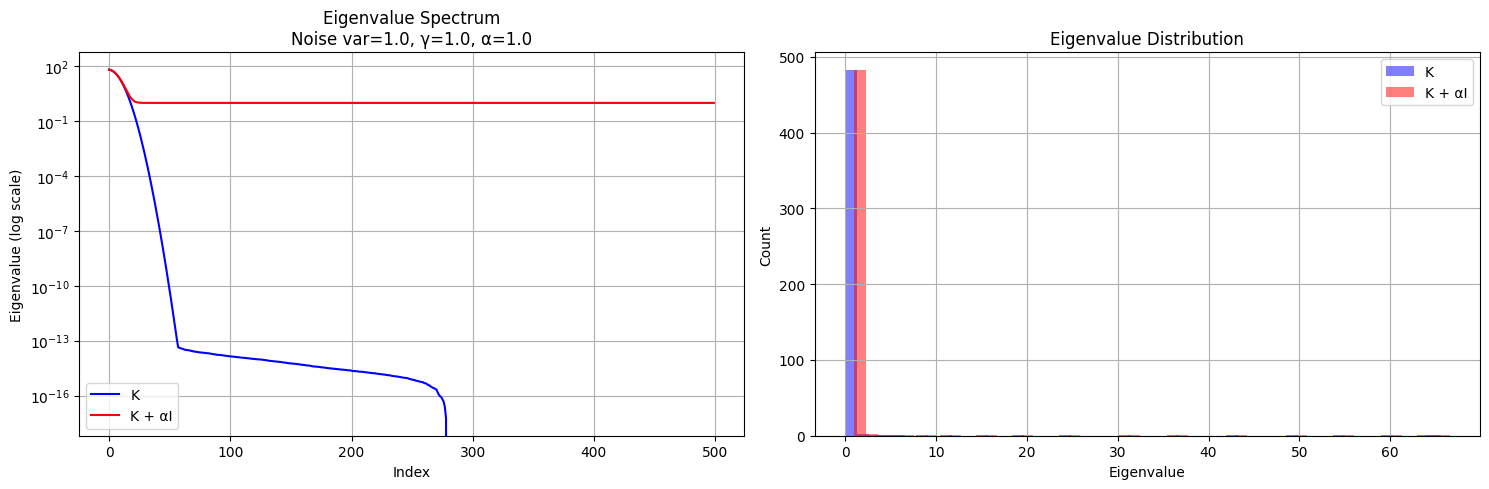


Spectrum Analysis for noise_var=1.0, γ=1.0, α=1.0
Original Kernel (K):
  Max eigenvalue: 65.5481
  Min eigenvalue: -3.9965e-14
  Condition number: -1.6402e+15
Regularized Kernel (K + αI):
  Max eigenvalue: 66.5481
  Min eigenvalue: 1.0000e+00
  Condition number: 6.6548e+01


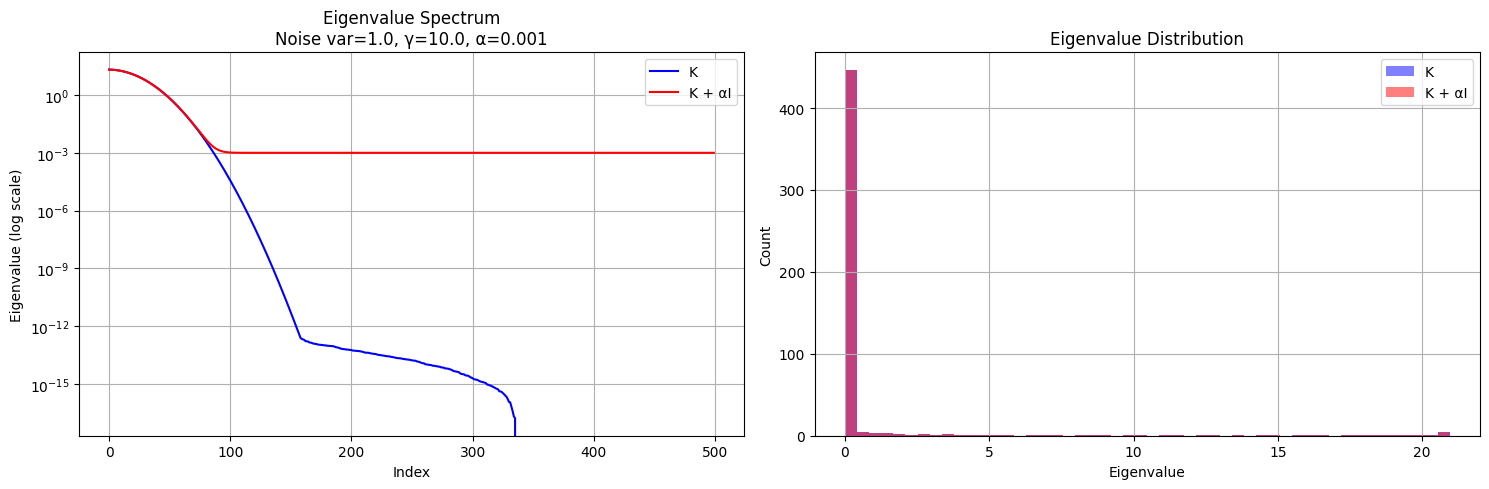


Spectrum Analysis for noise_var=1.0, γ=10.0, α=0.001
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 20.9571
  Min eigenvalue: 1.0000e-03
  Condition number: 2.0957e+04


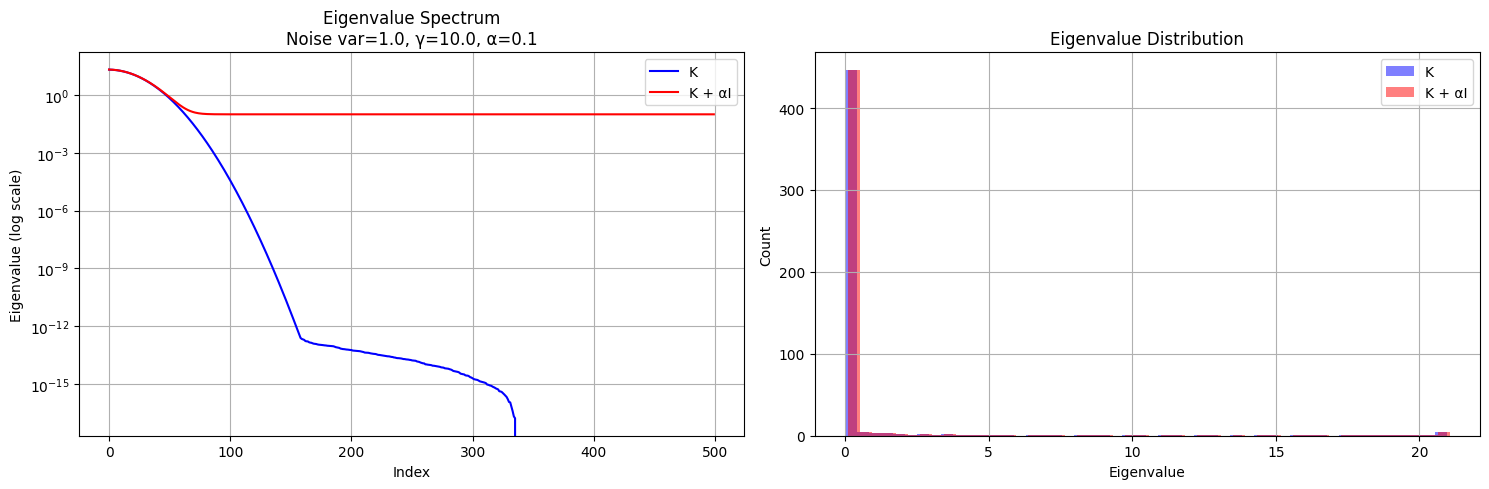


Spectrum Analysis for noise_var=1.0, γ=10.0, α=0.1
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 21.0561
  Min eigenvalue: 1.0000e-01
  Condition number: 2.1056e+02


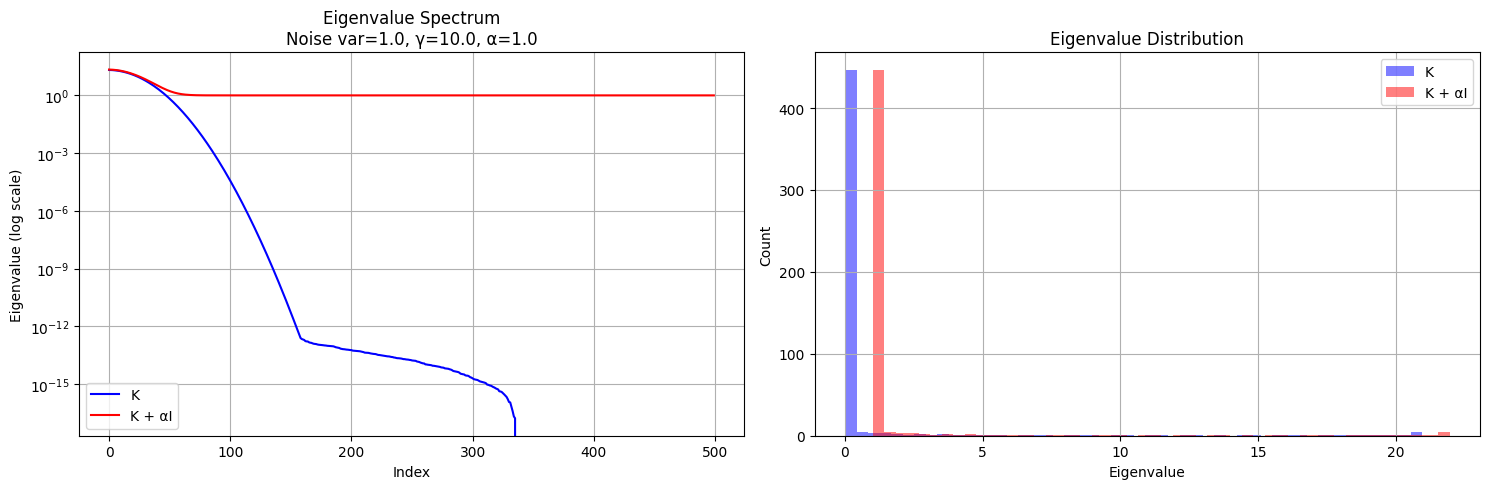


Spectrum Analysis for noise_var=1.0, γ=10.0, α=1.0
Original Kernel (K):
  Max eigenvalue: 20.9561
  Min eigenvalue: -3.1784e-13
  Condition number: -6.5932e+13
Regularized Kernel (K + αI):
  Max eigenvalue: 21.9561
  Min eigenvalue: 1.0000e+00
  Condition number: 2.1956e+01


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

# Generate synthetic data with noise
N = 500  # number of samples
X = np.linspace(-3*np.pi, 3*np.pi, N)
noise_levels = [0.1, 0.5, 1.0]  # different noise variances to test
gamma_values = [0.1, 1.0, 10.0]  # different gamma values to test
alpha_values = [0.001, 0.1, 1.0]  # different regularization values to test

# Compute RBF kernel matrix
def compute_kernel(X, gamma):
    D = pairwise_distances(X.reshape(-1, 1))
    return np.exp(-0.5 * gamma * D**2)

# Analyze eigenvalues
def analyze_spectrum(K, alpha, noise_var, gamma):
    # Ensure matrix is symmetric
    K = (K + K.T) / 2
    
    # Compute eigenvalues
    eigenvals_K = np.linalg.eigvalsh(K)
    eigenvals_K_reg = np.linalg.eigvalsh(K + alpha * np.eye(K.shape[0]))
    
    # Sort eigenvalues in descending order
    eigenvals_K = np.sort(eigenvals_K)[::-1]
    eigenvals_K_reg = np.sort(eigenvals_K_reg)[::-1]
    
    # Create plots
    plt.figure(figsize=(15, 5))
    
    # Plot eigenvalue spectrum
    plt.subplot(121)
    plt.semilogy(eigenvals_K, 'b-', label='K')
    plt.semilogy(eigenvals_K_reg, 'r-', label='K + αI')
    plt.title(f'Eigenvalue Spectrum\nNoise var={noise_var}, γ={gamma}, α={alpha}')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue (log scale)')
    plt.grid(True)
    plt.legend()
    
    # Plot eigenvalue distribution
    plt.subplot(122)
    plt.hist(eigenvals_K, bins=50, alpha=0.5, color='blue', label='K')
    plt.hist(eigenvals_K_reg, bins=50, alpha=0.5, color='red', label='K + αI')
    plt.title('Eigenvalue Distribution')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print spectrum analysis
    print(f"\nSpectrum Analysis for noise_var={noise_var}, γ={gamma}, α={alpha}")
    print(f"Original Kernel (K):")
    print(f"  Max eigenvalue: {np.max(eigenvals_K):.4f}")
    print(f"  Min eigenvalue: {np.min(eigenvals_K):.4e}")
    print(f"  Condition number: {np.max(eigenvals_K)/np.min(eigenvals_K):.4e}")
    print(f"Regularized Kernel (K + αI):")
    print(f"  Max eigenvalue: {np.max(eigenvals_K_reg):.4f}")
    print(f"  Min eigenvalue: {np.min(eigenvals_K_reg):.4e}")
    print(f"  Condition number: {np.max(eigenvals_K_reg)/np.min(eigenvals_K_reg):.4e}")

# Run analysis for different combinations
for noise_var in noise_levels:
    # Generate noisy data
    y = np.sinc(X/np.pi)
    noise = np.random.normal(0, np.sqrt(noise_var), N)
    yn = y + noise
    
    for gamma in gamma_values:
        # Compute kernel matrix
        K = compute_kernel(X, gamma)
        
        for alpha in alpha_values:
            # Analyze spectrum
            analyze_spectrum(K, alpha, noise_var, gamma)